In [1]:
import pandas as pd

In [2]:
path= r"C:\Users\swath\Downloads\Assignment.xlsx"
user_details= pd.read_excel(path,sheet_name="UserDetails.csv")
cooking_sessions= pd.read_excel(path,sheet_name="CookingSessions.csv")
order_details= pd.read_excel(path,sheet_name="OrderDetails.csv")

In [3]:
user_details.columns = user_details.columns.str.strip().str.replace(" ", "_").str.lower()
cooking_sessions.columns = cooking_sessions.columns.str.strip().str.replace(" ", "_").str.lower()
order_details.columns = order_details.columns.str.strip().str.replace(" ", "_").str.lower()

print("User Details Columns:", user_details.columns)
print("Cooking Sessions Columns:", cooking_sessions.columns)
print("Order Details Columns:", order_details.columns)

User Details Columns: Index(['user_id', 'user_name', 'age', 'location', 'registration_date', 'phone',
       'email', 'favorite_meal', 'total_orders'],
      dtype='object')
Cooking Sessions Columns: Index(['session_id', 'user_id', 'dish_name', 'meal_type', 'session_start',
       'session_end', 'duration_(mins)', 'session_rating'],
      dtype='object')
Order Details Columns: Index(['order_id', 'user_id', 'order_date', 'meal_type', 'dish_name',
       'order_status', 'amount_(usd)', 'time_of_day', 'rating', 'session_id'],
      dtype='object')


In [4]:
print(user_details.isnull().sum())

user_id              0
user_name            0
age                  0
location             0
registration_date    0
phone                0
email                0
favorite_meal        0
total_orders         0
dtype: int64


In [5]:
print(cooking_sessions.isnull().sum())

session_id         0
user_id            0
dish_name          0
meal_type          0
session_start      0
session_end        0
duration_(mins)    0
session_rating     0
dtype: int64


In [6]:
print(order_details.isnull().sum())

order_id        0
user_id         0
order_date      0
meal_type       0
dish_name       0
order_status    0
amount_(usd)    0
time_of_day     0
rating          2
session_id      0
dtype: int64


In [7]:
order_details['rating']= order_details['rating'].fillna(order_details['rating'].mean())

In [8]:
order_details['rating']

0     5.000000
1     4.000000
2     4.285714
3     4.000000
4     4.000000
5     4.000000
6     4.000000
7     4.285714
8     5.000000
9     4.000000
10    4.000000
11    4.000000
12    4.000000
13    5.000000
14    5.000000
15    4.000000
Name: rating, dtype: float64

In [9]:
merged_data = cooking_sessions.merge(user_details, on='user_id', how='left')

In [10]:
merged_data = merged_data.merge(order_details, on=['user_id', 'session_id'], how='left')

In [11]:
merged_data

,session_id,user_id,dish_name_x,meal_type_x,session_start,session_end,duration_(mins),session_rating,user_name,age,...,favorite_meal,total_orders,order_id,order_date,meal_type_y,dish_name_y,order_status,amount_(usd),time_of_day,rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,Alice Johnson,28,...,Dinner,12,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.000000
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,Bob Smith,35,...,Lunch,8,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.000000
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,Charlie Lee,42,...,Breakfast,15,1003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,4.285714
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,Alice Johnson,28,...,Dinner,12,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.000000
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,David Brown,27,...,Dinner,10,1005,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.000000
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,Bob Smith,35,...,Lunch,8,1006,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.000000
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6,Emma White,30,...,Lunch,9,1007,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.000000
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4,Charlie Lee,42,...,Breakfast,15,1008,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,4.285714
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,Alice Johnson,28,...,Dinner,12,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.000000
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1,Bob Smith,35,...,Lunch,8,1010,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.000000


In [12]:
total_sessions = merged_data['session_id'].nunique()
sessions_with_orders = merged_data[merged_data['order_id'].notnull()]['session_id'].nunique()

print(f"Total Cooking Sessions: {total_sessions}")
print(f"Cooking Sessions with Orders: {sessions_with_orders}")
print(f"Percentage of Sessions Resulting in Orders: {sessions_with_orders / total_sessions * 100:.2f}%")


Total Cooking Sessions: 16
Cooking Sessions with Orders: 16
Percentage of Sessions Resulting in Orders: 100.00%


In [13]:
user_conversion = merged_data.groupby('user_id').agg({
    'session_id': 'nunique',
    'order_id': lambda x: x.notnull().sum()
}).rename(columns={'session_id': 'total_sessions', 'order_id': 'sessions_with_orders'})

user_conversion['conversion_rate'] = (user_conversion['sessions_with_orders'] / user_conversion['total_sessions']) * 100
print(user_conversion)


         total_sessions  sessions_with_orders  conversion_rate
user_id                                                       
U001                  3                     3            100.0
U002                  3                     3            100.0
U003                  3                     3            100.0
U004                  2                     2            100.0
U005                  2                     2            100.0
U006                  1                     1            100.0
U007                  1                     1            100.0
U008                  1                     1            100.0


In [14]:
popular_dishes = merged_data.groupby('dish_name_y')['order_id'].count().sort_values(ascending=False).head(3)
print("Top 3 Popular Dishes:\n", popular_dishes)


Top 3 Popular Dishes:
 dish_name_y
Grilled Chicken    4
Spaghetti          4
Caesar Salad       3
Name: order_id, dtype: int64


In [15]:
pd.DataFrame.describe(merged_data)

,session_start,session_end,duration_(mins),session_rating,age,registration_date,total_orders,order_id,order_date,amount_(usd),rating
count,16,16,16.000000,16.000000,16.000000,16,16.000000,16.000000,16,16.000000,16.000000
mean,2024-12-05 02:50:37.500000,2024-12-05 03:20:56.249999872,30.312500,4.518750,32.687500,2023-03-31 16:30:00,10.562500,1008.500000,2024-12-04 12:00:00,11.250000,4.285714
min,2024-12-01 12:00:00,2024-12-01 12:20:00,10.000000,4.000000,25.000000,2023-01-15 00:00:00,5.000000,1001.000000,2024-12-01 00:00:00,7.000000,4.000000
25%,2024-12-03 08:37:30,2024-12-03 08:58:45,20.000000,4.300000,28.000000,2023-02-20 00:00:00,8.000000,1004.750000,2024-12-02 18:00:00,9.000000,4.000000
50%,2024-12-05 00:30:00,2024-12-05 00:57:30,30.000000,4.550000,30.500000,2023-03-10 00:00:00,10.000000,1008.500000,2024-12-04 12:00:00,11.500000,4.000000
75%,2024-12-06 23:22:30,2024-12-07 00:00:00,40.000000,4.725000,35.750000,2023-05-22 00:00:00,12.500000,1012.250000,2024-12-06 06:00:00,13.125000,4.464286
max,2024-12-08 19:30:00,2024-12-08 20:10:00,45.000000,5.000000,42.000000,2023-08-11 00:00:00,15.000000,1016.000000,2024-12-08 00:00:00,15.000000,5.000000
std,NaN,NaN,10.873324,0.292617,5.839164,NaN,3.119161,4.760952,NaN,2.435843,0.436436


In [16]:
age_meal_group = merged_data.groupby(['age', 'meal_type_x']).agg({
    'order_id': 'count'}).rename(columns={'order_id': 'total_orders'}).reset_index()
print(age_meal_group)

    age meal_type_x  total_orders
0    25      Dinner             1
1    27      Dinner             1
2    27       Lunch             1
3    28   Breakfast             1
4    28      Dinner             2
5    30      Dinner             1
6    30       Lunch             1
7    31       Lunch             1
8    35   Breakfast             1
9    35      Dinner             1
10   35       Lunch             1
11   38      Dinner             1
12   42   Breakfast             1
13   42      Dinner             1
14   42       Lunch             1


In [25]:
user_totals = merged_data.groupby('user_id').agg(
    Total_Sessions=('session_id', 'nunique'), 
    Total_Orders=('order_id', 'count')).reset_index()

print(user_totals)

  user_id  Total_Sessions  Total_Orders
0    U001               3             3
1    U002               3             3
2    U003               3             3
3    U004               2             2
4    U005               2             2
5    U006               1             1
6    U007               1             1
7    U008               1             1


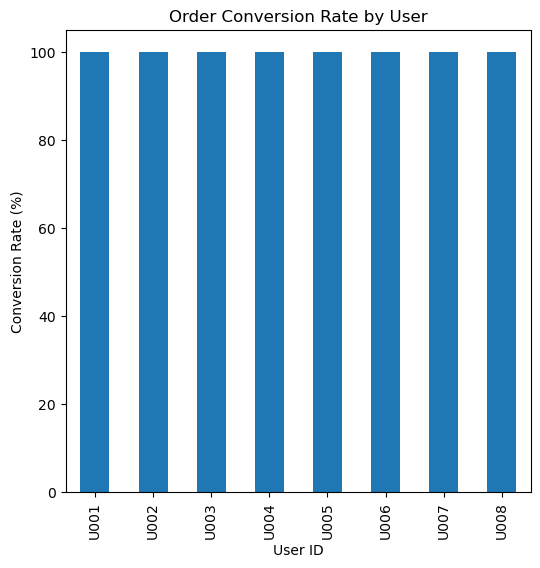

In [17]:
#Graph-Conversion rate
import matplotlib.pyplot as plt
user_conversion['conversion_rate'].plot(kind='bar', figsize=(6, 6))
plt.title('Order Conversion Rate by User')
plt.xlabel('User ID')
plt.ylabel('Conversion Rate (%)')
plt.show()


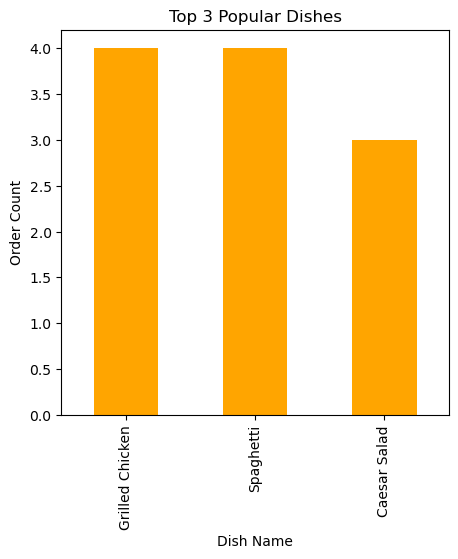

In [18]:
#Graph- Top 3 dishes
popular_dishes.plot(kind='bar', figsize=(5, 5), color='orange')
plt.title('Top 3 Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Order Count')
plt.show()

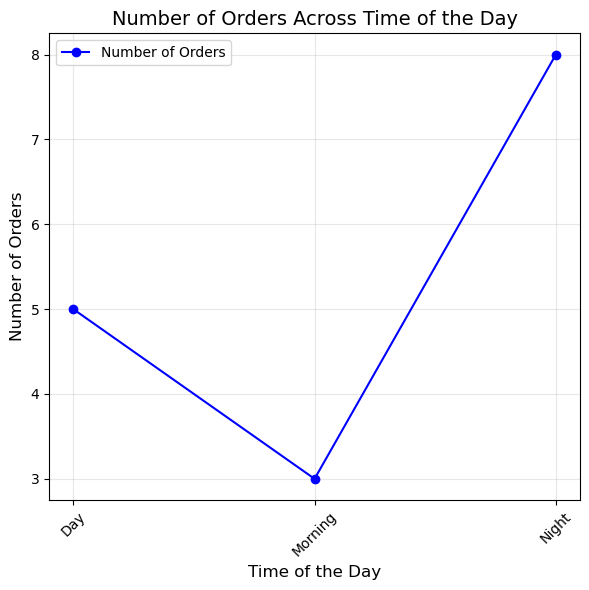

In [31]:
orders_by_hour = merged_data.groupby('time_of_day')['order_id'].count().reset_index()
plt.figure(figsize=(6, 6))
plt.plot(orders_by_hour['time_of_day'], orders_by_hour['order_id'], marker='o', color='blue', label='Number of Orders')
plt.xlabel('Time of the Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Number of Orders Across Time of the Day', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

plt.show()

C:\Users\swath\AppData\Local\Temp\ipykernel_10440\1233769835.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = merged_data.groupby('age_group')['amount_(usd)'].sum().reset_index()
C:\Users\swath\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


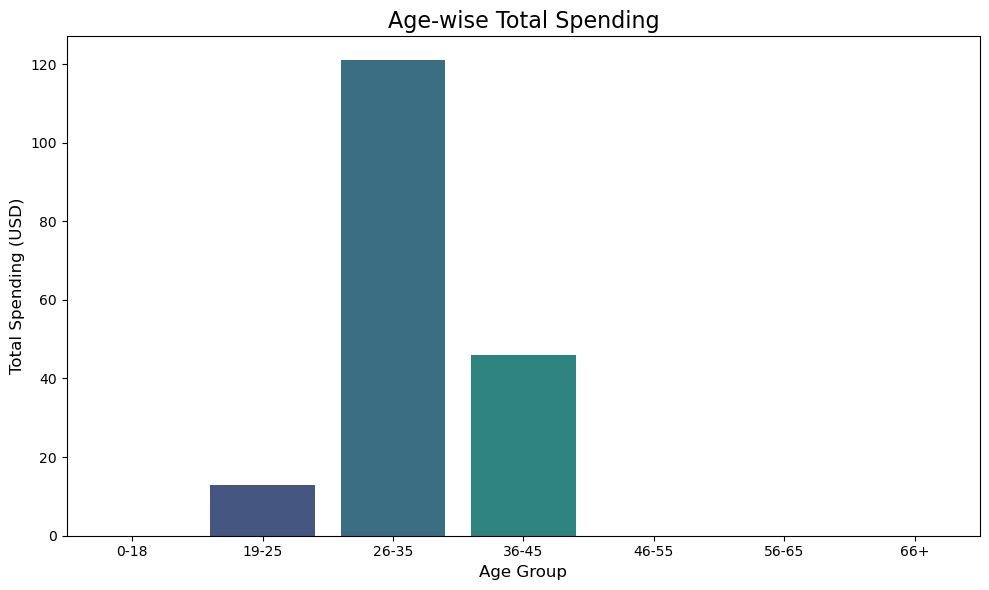

In [33]:
import seaborn as sns
merged_data['age_group'] = pd.cut(
    merged_data['age'], 
    bins=[0, 18, 25, 35, 45, 55, 65, 100],
    labels=["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "66+"]
)

# total spending by age group
age_group_spending = merged_data.groupby('age_group')['amount_(usd)'].sum().reset_index()

#ploting
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_spending, x='age_group', y='amount_(usd)', palette="viridis")
plt.title('Age-wise Total Spending', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Spending (USD)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

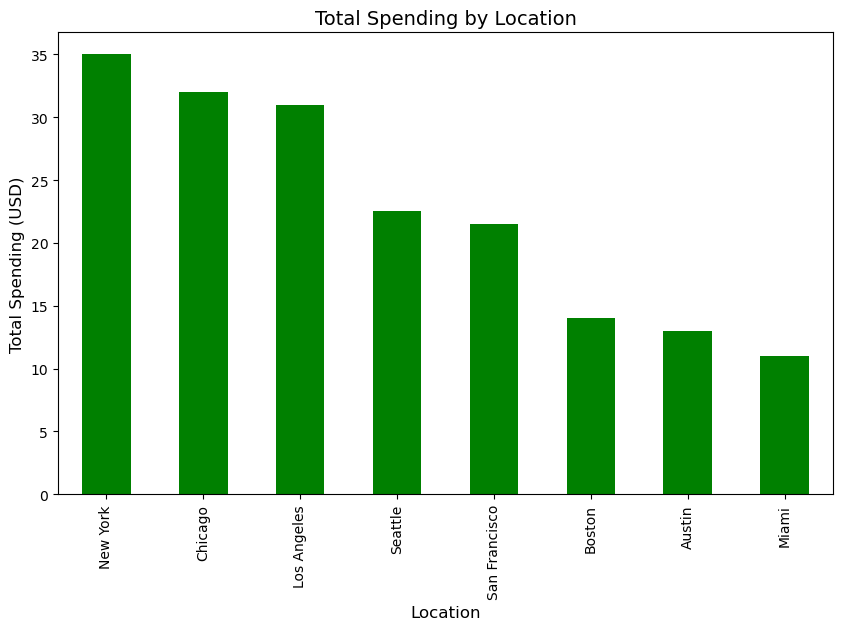

In [35]:
location_spending = merged_data.groupby('location')['amount_(usd)'].sum().sort_values(ascending=False)

# Plotting total spending by location
plt.figure(figsize=(10,6))
location_spending.plot(kind='bar', color='green')
plt.title('Total Spending by Location', fontsize=14)
plt.ylabel('Total Spending (USD)', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.xticks(rotation=90)
plt.show()

